In [ ]:
# Import Necessary Libiraries
import os
import numpy as np
import tensorflow as tf
import shutil
import glob
import random
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

### 2. Data Understanding

In [ ]:
train_dir = 'drive/My Drive/PaymentReceipt/dataset/train'
test_dir = 'drive/My Drive/PaymentReceipt/dataset/test'
val_dir = 'drive/My Drive/PaymentReceipt/dataset/val'

In [ ]:
os.listdir(train_dir)

['KPay', 'AYAPay', 'CBPay', 'WavePay', 'Other']

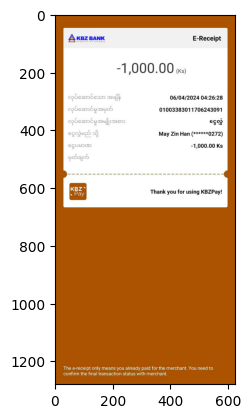

In [ ]:
import cv2
import matplotlib.pyplot as plt

files = glob.glob(os.path.join(val_dir,'KPay') + '/*')[10]
image = cv2.imread(files)
plt.imshow(image)


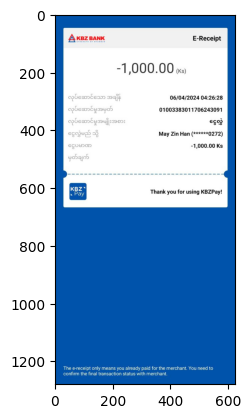

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [ ]:
image_size = image_rgb.shape
print(f"Image size: {image_size}")

Image size: (1280, 624, 3)


### 3.Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''datagen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)'''

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)


In [ ]:
batch_size = 5
target_size = (270, 270)
train_set = datagen_train.flow_from_directory(train_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)
val_set = datagen_val.flow_from_directory(val_dir,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          class_mode='categorical',
                                          shuffle=False)
test_set = datagen_test.flow_from_directory(test_dir,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 516 images belonging to 5 classes.
Found 94 images belonging to 5 classes.
Found 110 images belonging to 5 classes.


### 4. Modeling

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu', input_shape=(270, 270, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                    batch_size=batch_size,
                    epochs=10,
                    validation_data=val_set,
                    verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 - 210s - 2s/step - accuracy: 0.6143 - loss: 1.4332 - val_accuracy: 0.7660 - val_loss: 0.8557
Epoch 2/10
104/104 - 203s - 2s/step - accuracy: 0.8081 - loss: 0.6211 - val_accuracy: 0.8085 - val_loss: 0.4993
Epoch 3/10
104/104 - 205s - 2s/step - accuracy: 0.8663 - loss: 0.5310 - val_accuracy: 0.8511 - val_loss: 0.3646
Epoch 4/10
104/104 - 208s - 2s/step - accuracy: 0.9012 - loss: 0.3603 - val_accuracy: 0.8723 - val_loss: 0.3433
Epoch 5/10
104/104 - 258s - 2s/step - accuracy: 0.9109 - loss: 0.3476 - val_accuracy: 0.8830 - val_loss: 0.5294
Epoch 6/10
104/104 - 204s - 2s/step - accuracy: 0.9516 - loss: 0.1858 - val_accuracy: 0.8936 - val_loss: 0.4075
Epoch 7/10
104/104 - 207s - 2s/step - accuracy: 0.9632 - loss: 0.1575 - val_accuracy: 0.8617 - val_loss: 0.5740
Epoch 8/10
104/104 - 203s - 2s/step - accuracy: 0.8488 - loss: 0.6078 - val_accuracy: 0.8085 - val_loss: 1.7299
Epoch 9/10
104/104 - 263s - 3s/step - accuracy: 0.9031 - loss: 0.3917 - val_accuracy: 0.8723 - val_loss: 0.9942
Epo

In [ ]:
base_path = 'drive/My Drive/'
save_model = os.path.join(base_path, 'PaymentReceipt', 'model/cnn')
os.makedirs(save_model, exist_ok= True)

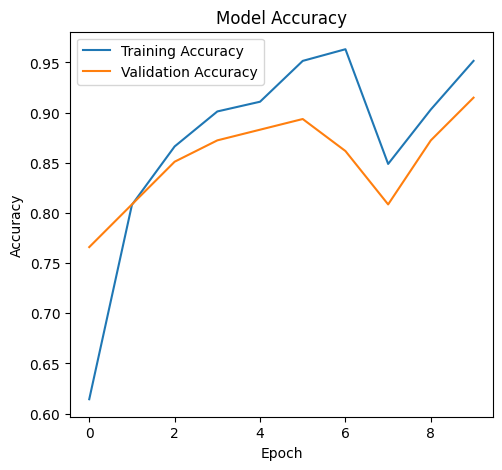

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.savefig(os.path.join(save_model,'Model_Accuracy_' + str(batch_size) + '.png'), dpi=300, bbox_inches='tight')

### 5. Evaluation

In [ ]:
class_dict = test_set.class_indices
y_predicted = model.predict(test_set)
y_pred = []
for i in y_predicted:
  y_pred.append(np.argmax(i))

22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 385ms/step


In [ ]:
y_test = test_set.classes.tolist()

In [ ]:
class_dict

{'AYAPay': 0, 'CBPay': 1, 'KPay': 2, 'Other': 3, 'WavePay': 4}

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[12  2  0  3  0]
 [ 1 17  0  0  0]
 [ 0  1 38  0  2]
 [ 0  5  1  1  1]
 [ 0  0  0  0 26]]


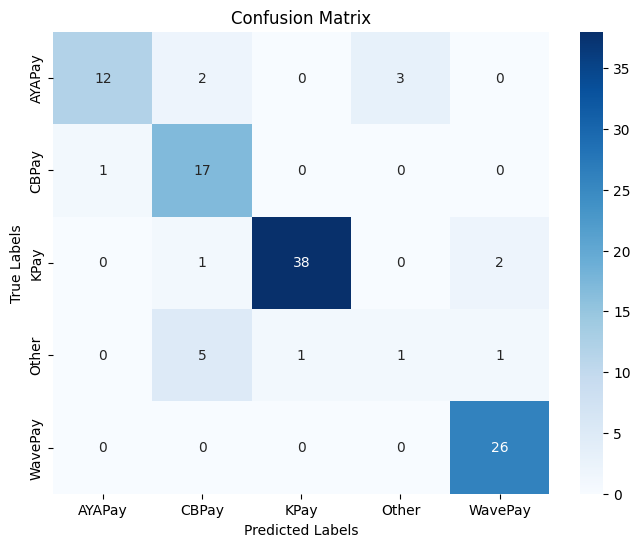

In [ ]:
import seaborn as sns
# Define class labels (optional)
class_names = test_set.class_indices.keys()
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(save_model,'test_confusion_matrix_cnn_b' + str(batch_size) + '.png'), dpi=300, bbox_inches='tight')
plt.show()


Accuracy Score: 85.45454545454545%
Precision Score: 74.47975243147657%
Recall Score: 74.04312131356608%
F1 Score: 73.05637773079631%


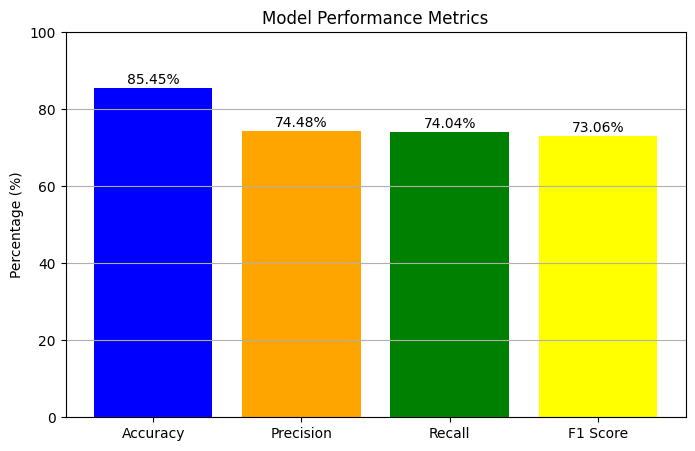

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def calculate_metrics(y_true, y_pred, title):
      # Calculate metrics
      print()
      accuracy = accuracy_score(y_true, y_pred) * 100
      precision = precision_score(y_true, y_pred, average='macro') * 100
      recall = recall_score(y_true, y_pred,average='macro')*100
      f1 = f1_score(y_true, y_pred, average='macro') * 100

      # Print metrics
      print(f"Accuracy Score: {accuracy}%")
      print(f"Precision Score: {precision}%")
      print(f"Recall Score: {recall}%")
      print(f"F1 Score: {f1}%")

      # Plotting the metrics
      metrics = [accuracy, precision, recall, f1]
      metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

      plt.figure(figsize=(8, 5))
      plt.bar(metrics_names, metrics, color=['blue', 'orange', 'green', 'yellow'])
      plt.ylim(0, 100)
      plt.ylabel('Percentage (%)')
      plt.title('Model Performance Metrics')
      plt.grid(axis='y')

      # Display the value on top of the bars
      for index, value in enumerate(metrics):
          plt.text(index, value + 1, f"{value:.2f}%", ha='center')

      plt.savefig(os.path.join(save_model, title + '_accuracy_cnn_b' + str(batch_size) + '.png'), dpi=300, bbox_inches='tight')
      plt.show()

calculate_metrics(y_test, y_pred,'test')

In [ ]:
z_test = val_set.classes.tolist()

94

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step

Accuracy Score: 91.48936170212765%
Precision Score: 92.76679841897233%
Recall Score: 83.99999999999999%
F1 Score: 85.25969447708577%


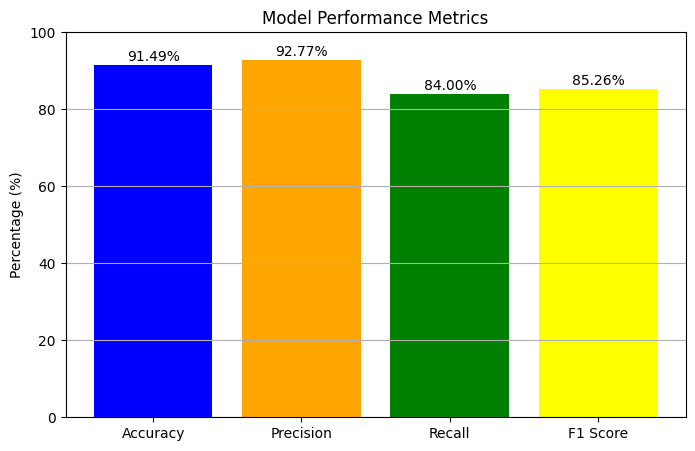

In [ ]:
class_dict = val_set.class_indices
z_predicted = model.predict(val_set)
z_pred = []
for i in z_predicted:
  z_pred.append(np.argmax(i))

calculate_metrics(z_test, z_pred, 'validation')

### Save Model

In [ ]:
save_file = save_model + '/cnn_b' + str(batch_size) +  '.h5'

# Save the entire model to a HDF5 file
model.save(save_file)

In [ ]:
'''from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

# load and preprocess the image
def load_and_preprocess_image(image_path, target_size = (270, 270)):

    # Load the image
    image = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    image = img_to_array(image)
    # Expand dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)
    # Normalize the image (if your model was trained on normalized data)
    image /= 255.0
    return image

predict = {}
class_labels = ['AYAPay', 'CBPay', 'KPay', 'Other', 'WavePay']
image_folder = os.path.join(base_path, 'PaymentReceipt', 'dataset/deploy test data')
test_images_path = glob.glob(image_folder + '/**/*')

if len(test_images_path) > 0:
  # Load the trained model
  loaded_model = load_model(save_file)

for img_path in test_images_path:
  dir, fileName = os.path.split(img_path)
  # Preprocess the image
  image = load_and_preprocess_image(img_path)

  # Make predictions
  predictions = loaded_model.predict(image)
  # Process the predictions
  predicted_class = np.argmax(predictions, axis=1)
  predicted_class = class_labels[predicted_class[0]]
  predict[fileName] = predicted_class
  print(fileName,':', predicted_class)'''

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
3.PNG : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
6.PNG : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Other_1.jpg : Other
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Other_28.jpg : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
WavePay_64.jpg : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
WavePay_102.jpg : WavePay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
WavePay_79.jpg : WavePay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
WavePay_25.jpg : WavePay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
KPay_1.JPG : KPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
KPay_113.jpg : KPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
KPay_34.jpg : KPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
CBPay_0.jpg : Other
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
CBPay_38.jpg : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
CBPay_62.jpg : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
AYAPay_14.jpg : AYAPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
AYAPay_38.jpg : AYAPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
AYAPay_33.jpg : Ot

#### Hyperparameter Tunning